# eda - for the observation_based data

spz_Wasserstand_analyse\data\wasserstand\camels_ch\timeseries\observation_based

In [137]:
# Grundlegende Libraries importieren
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller


## Andermatt

| Column Name              | Bedeutung                                                                                               |
|--------------------------|---------------------------------------------------------------------------------------------------------|
| date                     | Datum der Messung.                                                                     |
| discharge_vol (m³/s)     | Gemessener Abfluss (Volumen) des Gewässers in Kubikmeter pro Sekunde.                                  |
| discharge_spec (mm/d)    | Spezifischer Abfluss in Millimeter pro Tag – normierter Abfluss bezogen auf die Fläche des Einzugsgebiets. |
| waterlevel (m)           | Wasserstand im Gewässer in Metern.                                                                     |
| precipitation (mm/d)     | Gemessene Niederschlagsmenge in Millimeter pro Tag.                                                    |
| temperature_min (°C)     | Gemessene minimale Lufttemperatur in Grad Celsius.                                                     |
| temperature_mean (°C)    | Gemessene durchschnittliche Lufttemperatur in Grad Celsius.                                            |
| temperature_max (°C)     | Gemessene maximale Lufttemperatur in Grad Celsius.                                                     |
| rel_sun_dur (%)          | Relative Sonnenscheindauer in Prozent, Verhältnis zur möglichen Sonnenscheindauer.                     |
| swe (mm)                 | Schnee-Wasser-Äquivalent in Millimeter – misst die Wassermenge im Schnee.                              |


In [138]:
df_observation_andermatt = pd.read_csv('../data/wasserstand/camels_ch/timeseries/observation_based/CAMELS_CH_obs_based_2087.csv')

# 'date'-Spalte in datetime-Format umwandeln
df_observation_andermatt['date'] = pd.to_datetime(df_observation_andermatt['date'])

# Als Index setzen
df_observation_andermatt.set_index('date', inplace=True)


df_observation_andermatt

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1981-01-01,1.960,0.890,1426.559,7.96,-13.14,-7.66,-1.06,5.17,NaN
1981-01-02,1.763,0.801,1426.546,11.66,-13.26,-10.12,-3.96,0.44,NaN
1981-01-03,1.827,0.830,1426.550,33.11,-8.13,-3.90,-0.99,25.89,NaN
1981-01-04,1.837,0.835,1426.550,40.16,-13.63,-7.57,-4.23,0.05,NaN
1981-01-05,1.771,0.805,1426.546,12.72,-15.26,-14.08,-13.03,0.04,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


In [139]:
# Übersicht & Kontrolle
print(df_observation_andermatt.info())
print(r'*****')
print(df_observation_andermatt.head())
print(r'*****')
print(df_observation_andermatt.describe())


# Fehltage analysieren
df_observation_andermatt.isna().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14610 entries, 1981-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   discharge_vol(m3/s)     14610 non-null  float64
 1   discharge_spec(mm/d)    14610 non-null  float64
 2   waterlevel(m)           14610 non-null  float64
 3   precipitation(mm/d)     14610 non-null  float64
 4   temperature_min(degC)   14610 non-null  float64
 5   temperature_mean(degC)  14610 non-null  float64
 6   temperature_max(degC)   14610 non-null  float64
 7   rel_sun_dur(%)          14610 non-null  float64
 8   swe(mm)                 8157 non-null   float64
dtypes: float64(9)
memory usage: 1.1 MB
None
*****
            discharge_vol(m3/s)  discharge_spec(mm/d)  waterlevel(m)  \
date                                                                   
1981-01-01                1.960                 0.890       1426.559   
1981-01-02               

discharge_vol(m3/s)          0
discharge_spec(mm/d)         0
waterlevel(m)                0
precipitation(mm/d)          0
temperature_min(degC)        0
temperature_mean(degC)       0
temperature_max(degC)        0
rel_sun_dur(%)               0
swe(mm)                   6453
dtype: int64

In [140]:
# Correlations

# Correlation with waterlevel(m)
corr = df_observation_andermatt.corr(numeric_only=True)
corr['waterlevel(m)'].sort_values(ascending=False)

waterlevel(m)             1.000000
discharge_spec(mm/d)      0.929226
discharge_vol(m3/s)       0.929226
temperature_min(degC)     0.583711
temperature_mean(degC)    0.576789
temperature_max(degC)     0.561642
precipitation(mm/d)       0.202508
swe(mm)                  -0.085142
rel_sun_dur(%)           -0.110789
Name: waterlevel(m), dtype: float64

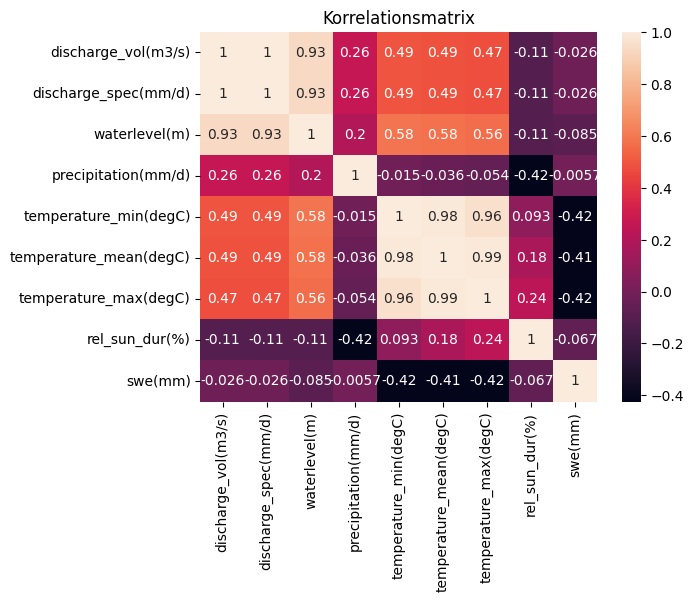

In [141]:
# Correlation of all variables
sns.heatmap(df_observation_andermatt.corr(), annot=True)
plt.title('Korrelationsmatrix')
plt.show()

according to the informations above we'll only keep the coefficients 'discharge_vol' and 'temperature_mean'

In [142]:
# check that there are as many datapoints as there are days between 01.01.1981 and 31.12.2018

start_date = datetime(1981, 1, 1)
end_date = datetime(2020, 12, 31)

delta = end_date - start_date
print(delta.days+1)

df_observation_andermatt.shape


14610


(14610, 9)

In [143]:
swe = df_observation_andermatt[df_observation_andermatt['swe(mm)'].notna()]
swe

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1998-09-02,4.863,2.209,1426.807,0.08,6.86,10.37,15.08,39.10,0.0
1998-09-03,6.278,2.852,1426.855,17.01,6.08,8.47,12.29,25.30,0.0
1998-09-04,5.020,2.281,1426.814,37.83,4.72,8.19,12.63,43.10,0.0
1998-09-05,15.947,7.245,1427.069,13.04,1.68,4.07,7.50,6.04,0.0
1998-09-06,6.222,2.827,1426.857,0.00,1.37,5.56,10.73,86.75,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


- swe(mm) gibt es Daten von 1998-09-02 - 2020-12-31

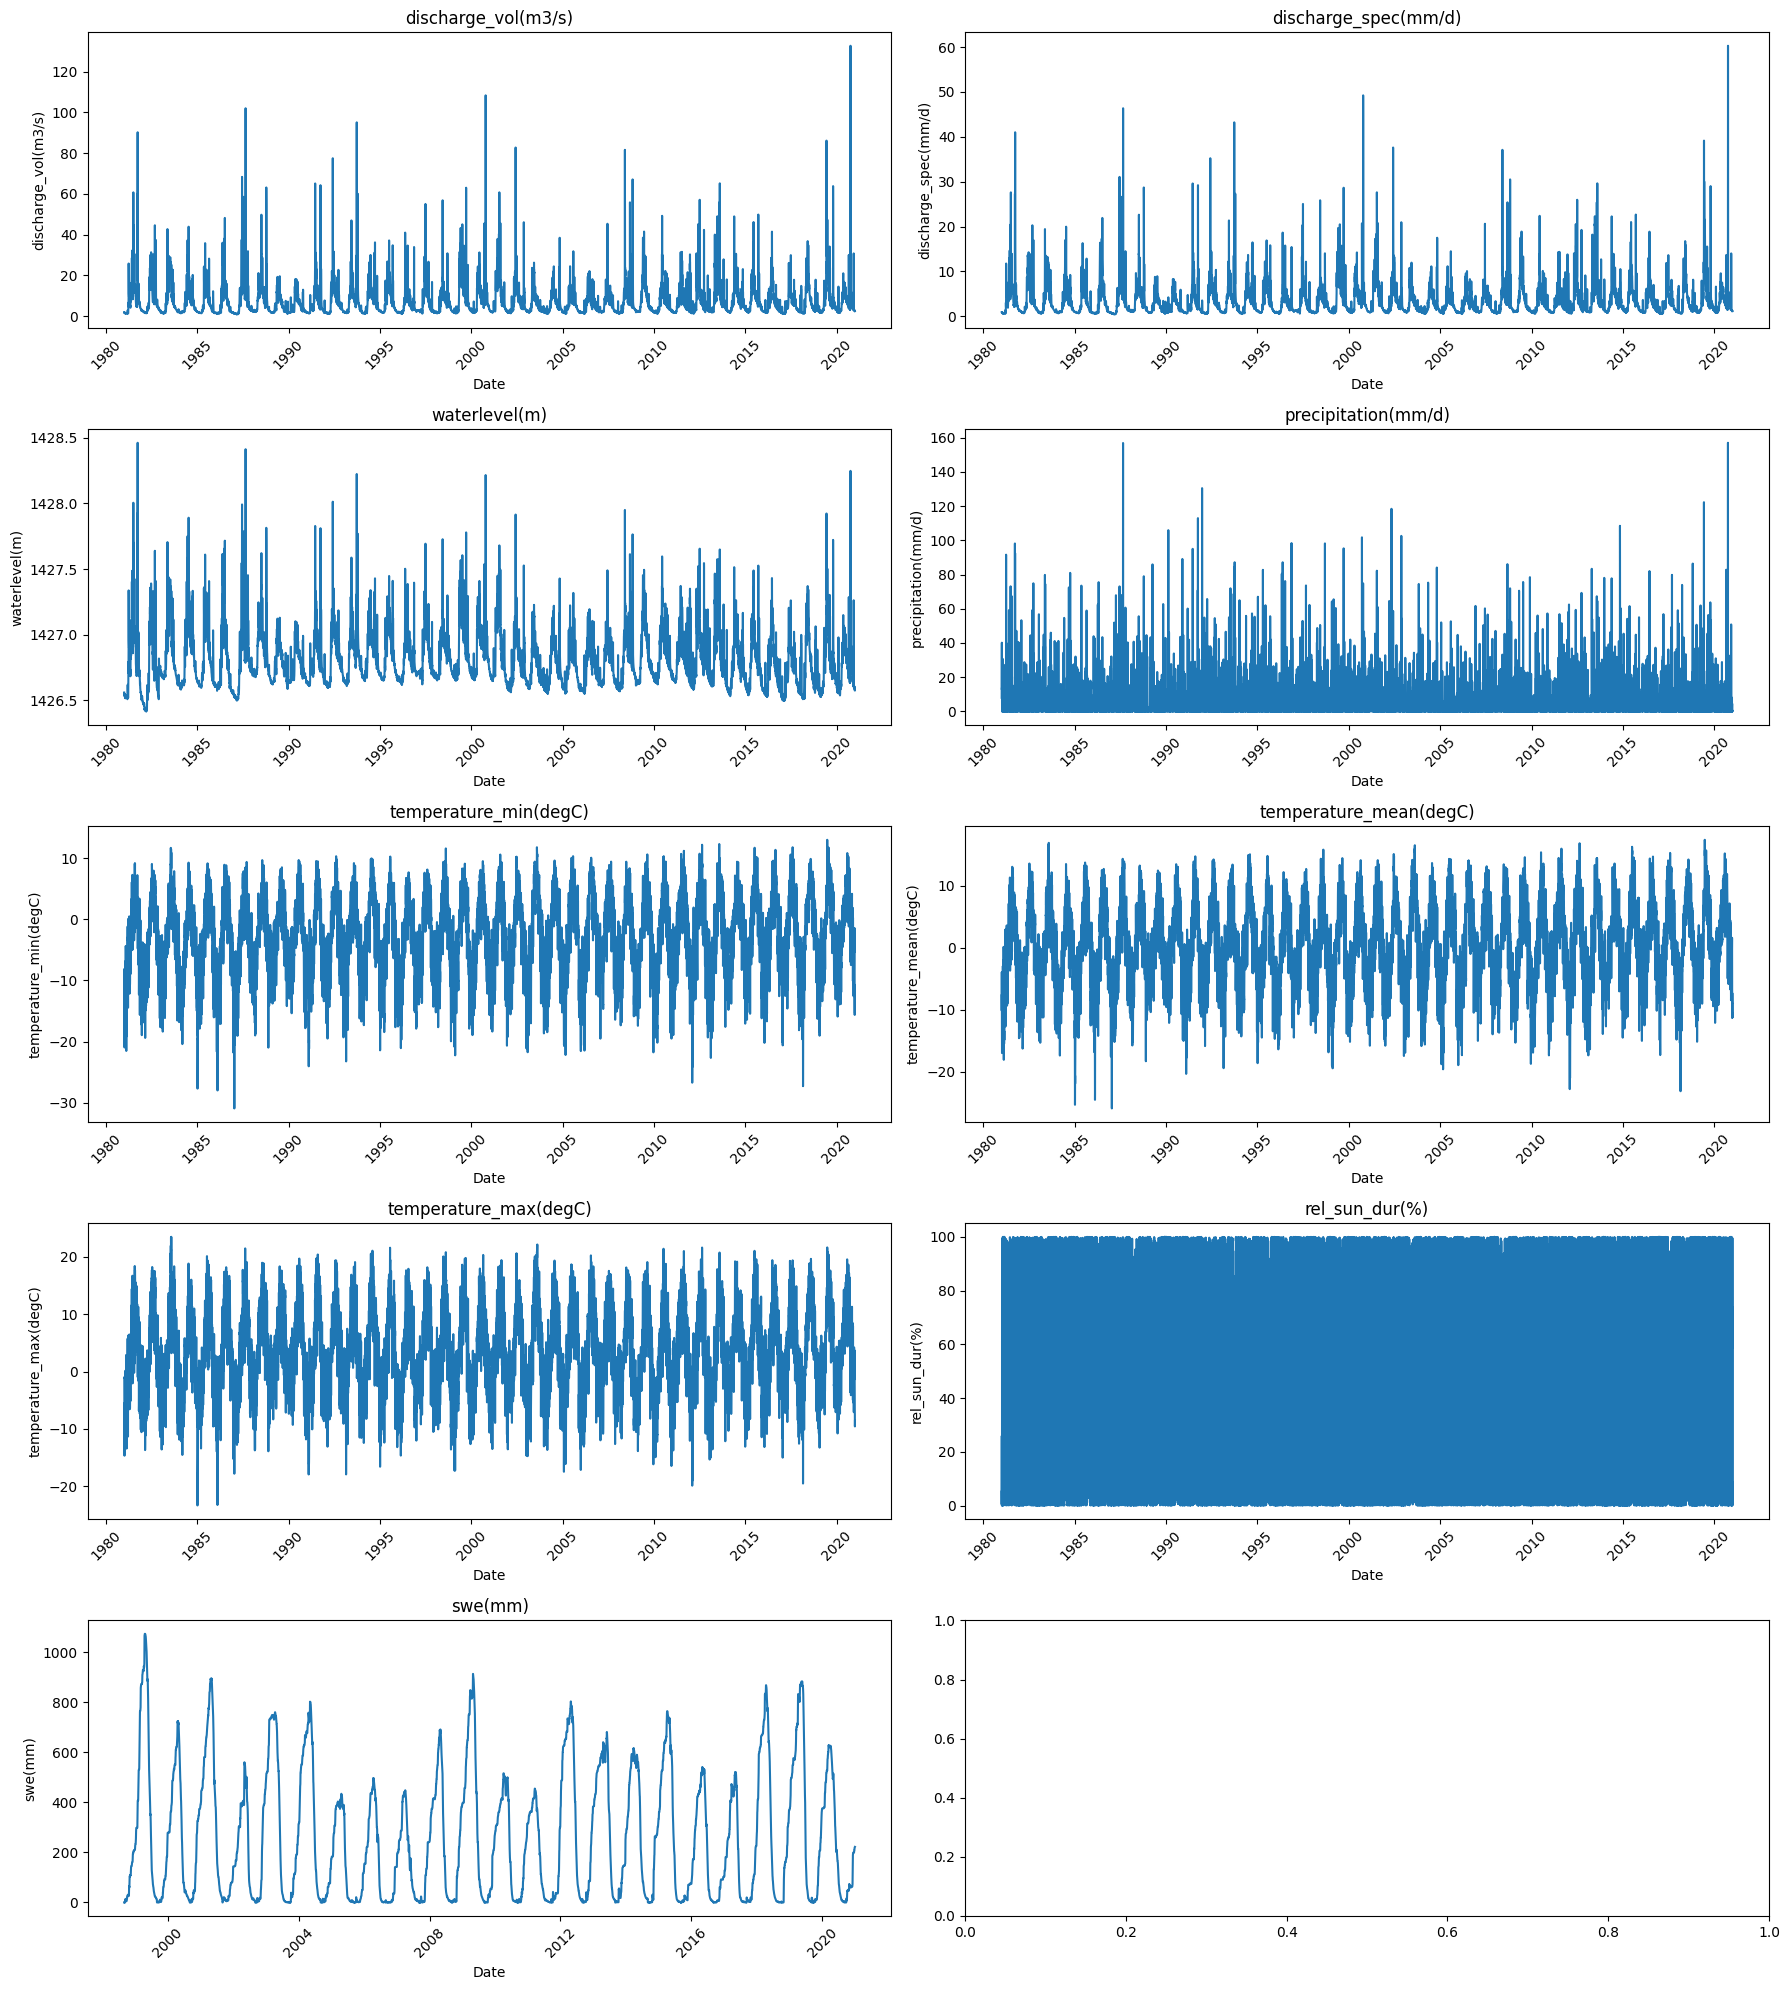

In [144]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20))
axes = axes.flatten()

for i, col in enumerate(df_observation_andermatt.columns):
    axes[i].plot(df_observation_andermatt.index, df_observation_andermatt[col])
    axes[i].set_title(col)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show();


# Modellierung


Sandra: 
- Residuen stationär machen
- Cross-Korrelation 
  
Ädu:
- Gletscher Daten
- ACF/PACF


--> extremwert analyse auf Residuen

## Zerlegung

In [145]:
# Libraries für Zeitreihenanalyse
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [146]:
df_observation_andermatt

,discharge_vol(m3/s),discharge_spec(mm/d),waterlevel(m),precipitation(mm/d),temperature_min(degC),temperature_mean(degC),temperature_max(degC),rel_sun_dur(%),swe(mm)
date,,,,,,,,,
1981-01-01,1.960,0.890,1426.559,7.96,-13.14,-7.66,-1.06,5.17,NaN
1981-01-02,1.763,0.801,1426.546,11.66,-13.26,-10.12,-3.96,0.44,NaN
1981-01-03,1.827,0.830,1426.550,33.11,-8.13,-3.90,-0.99,25.89,NaN
1981-01-04,1.837,0.835,1426.550,40.16,-13.63,-7.57,-4.23,0.05,NaN
1981-01-05,1.771,0.805,1426.546,12.72,-15.26,-14.08,-13.03,0.04,NaN
...,...,...,...,...,...,...,...,...,...
2020-12-27,2.546,1.157,1426.579,0.85,-12.28,-7.29,-3.80,0.04,218.0
2020-12-28,2.712,1.232,1426.589,0.67,-11.63,-8.97,-7.13,1.82,220.0
2020-12-29,2.616,1.188,1426.583,0.30,-10.72,-8.95,-7.50,0.18,221.0


In [147]:
df_important_coef = df_observation_andermatt[['waterlevel(m)','discharge_vol(m3/s)','temperature_mean(degC)']]
df_important_coef

,waterlevel(m),discharge_vol(m3/s),temperature_mean(degC)
date,,,
1981-01-01,1426.559,1.960,-7.66
1981-01-02,1426.546,1.763,-10.12
1981-01-03,1426.550,1.827,-3.90
1981-01-04,1426.550,1.837,-7.57
1981-01-05,1426.546,1.771,-14.08
...,...,...,...
2020-12-27,1426.579,2.546,-7.29
2020-12-28,1426.589,2.712,-8.97
2020-12-29,1426.583,2.616,-8.95


In [172]:
df_important_coef_diff = df_important_coef.copy()

# 1. Differenzbildung fuer 'waterlevel(m)'
df_important_coef_diff['waterlevel_diff'] = df_important_coef_diff['waterlevel(m)'].diff()

# 2. Differenzbildung fuer 'discharge_vol(m3/s)'
df_important_coef_diff['discharge_diff'] = df_important_coef_diff['discharge_vol(m3/s)'].diff()

# Erster Wert faellt weg wegen NaN durch diff
df_important_coef_diff.dropna(inplace=True)

# Zweite Differenz auf dem gleichen DataFrame aufbauen
df_important_coef_diff['waterlevel_diff2'] = df_important_coef_diff['waterlevel_diff'].diff()
df_important_coef_diff['discharge_diff2'] = df_important_coef_diff['discharge_diff'].diff()

df_important_coef_diff.dropna(inplace=True)




In [173]:
df_important_coef_diff

,waterlevel(m),discharge_vol(m3/s),temperature_mean(degC),waterlevel_diff,discharge_diff,waterlevel_diff2,discharge_diff2
date,,,,,,,
1981-01-03,1426.550,1.827,-3.90,0.004,0.064,0.017,0.261
1981-01-04,1426.550,1.837,-7.57,0.000,0.010,-0.004,-0.054
1981-01-05,1426.546,1.771,-14.08,-0.004,-0.066,-0.004,-0.076
1981-01-06,1426.551,1.855,-12.79,0.005,0.084,0.009,0.150
1981-01-07,1426.542,1.723,-16.89,-0.009,-0.132,-0.014,-0.216
...,...,...,...,...,...,...,...
2020-12-27,1426.579,2.546,-7.29,-0.008,-0.131,-0.018,-0.299
2020-12-28,1426.589,2.712,-8.97,0.010,0.166,0.018,0.297
2020-12-29,1426.583,2.616,-8.95,-0.006,-0.096,-0.016,-0.262


In [149]:
df_important_coef_log = df_important_coef.copy()

df_important_coef_log['waterlevel_log_diff'] = np.log(df_important_coef_log['waterlevel(m)']).diff()
df_important_coef_log['waterlevel_log_diff_2'] = np.log(df_important_coef_log['waterlevel_log_diff']).diff()

df_important_coef_log['discharge_log_diff'] = np.log(df_important_coef_log['discharge_vol(m3/s)']).diff()
df_important_coef_log['discharge_log_diff_2'] = np.log(df_important_coef_log['discharge_log_diff']).diff()

df_important_coef_log.dropna(inplace=True)


c:\Users\Sandra\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sandra\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sandra\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Sandra\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
def plot_seasonal_decompose_all(df, period=365, model_type='additive'):
    """
    Fuehrt eine saisonale Dekomposition fuer alle numerischen Spalten eines DataFrames durch 
    und erstellt zu jeder Spalte ein Plot der Zerlegung in Trend, Saison und Restkomponente.
    Zudem fuhrt sie Augmented Dickey-Fuller Tests auf ganze Zeitreihe, Residuen und Trend durch
    und gibt die p-Werte aus.
    
    Parameter
    ----------
    df : pandas.DataFrame
        Eingabedaten mit Zeitreihen in den Spalten.
    period : int, optional
        Länge des saisonalen Zyklus (Standard: 365). 
        Beispiel: 12 fuer monatliche Daten ueber ein Jahr.
    model_type : {'additive', 'multiplicative'}, optional
        Typ des Modells fuer die saisonale Komponente (Standard: 'additive').
    
    Hinweise
    --------
    - Die Funktion ignoriert nicht-numerische Spalten automatisch.
    - Bei Fehlern in einer Spalte wird eine Fehlermeldung ausgegeben, 
      ohne die Verarbeitung der weiteren Spalten zu unterbrechen.
    """
    for col in df.select_dtypes(include="number").columns:
        try:
            series = df[col].dropna()
            result = seasonal_decompose(series, model=model_type, period=period)
            fig = result.plot()
            fig.suptitle(f'Seasonal Decompose: {col}', fontsize=16)
            fig.set_size_inches(12, 10)
            plt.tight_layout()
            plt.show()

            # ADF Tests
            r = adfuller(series, maxlag=12)
            print(f'p-Wert ganze Zeitreihe ({col}): {r[1]:.6f}')

            temp_resid = result.resid.dropna()
            r = adfuller(temp_resid, maxlag=12)
            print(f'p-Wert Residuen ({col}): {r[1]:.6f}')

            temp_trend = result.trend.dropna()
            r = adfuller(temp_trend, maxlag=12)
            print(f'p-Wert Trend ({col}): {r[1]:.6f}')

            print('--------------------------------------------------')

        except Exception as e:
            print(f"Fehler bei '{col}': {e}")


In [151]:
df_important_coef_log

,waterlevel(m),discharge_vol(m3/s),temperature_mean(degC),waterlevel_log_diff,waterlevel_log_diff_2,discharge_log_diff,discharge_log_diff_2
date,,,,,,,
1981-01-04,1426.550,1.837,-7.57,0.000000e+00,-inf,0.005459,-1.876805
1981-01-10,1426.547,1.784,-8.29,0.000000e+00,-inf,0.000561,-5.240098
1981-01-22,1426.526,1.505,-10.03,4.206031e-06,0.693144,0.056026,0.602073
1981-01-29,1426.527,1.522,-6.52,4.907034e-06,0.847294,0.067961,0.771133
1981-02-03,1426.528,1.534,-3.93,1.402006e-06,-0.000001,0.019750,0.164061
...,...,...,...,...,...,...,...
2020-12-02,1426.611,3.135,-8.44,2.803852e-06,0.287680,0.027816,0.480575
2020-12-05,1426.668,4.419,-5.83,3.715019e-05,2.178512,0.321201,2.218889
2020-12-06,1427.262,30.820,-5.89,4.162681e-04,2.416361,1.942250,1.799534


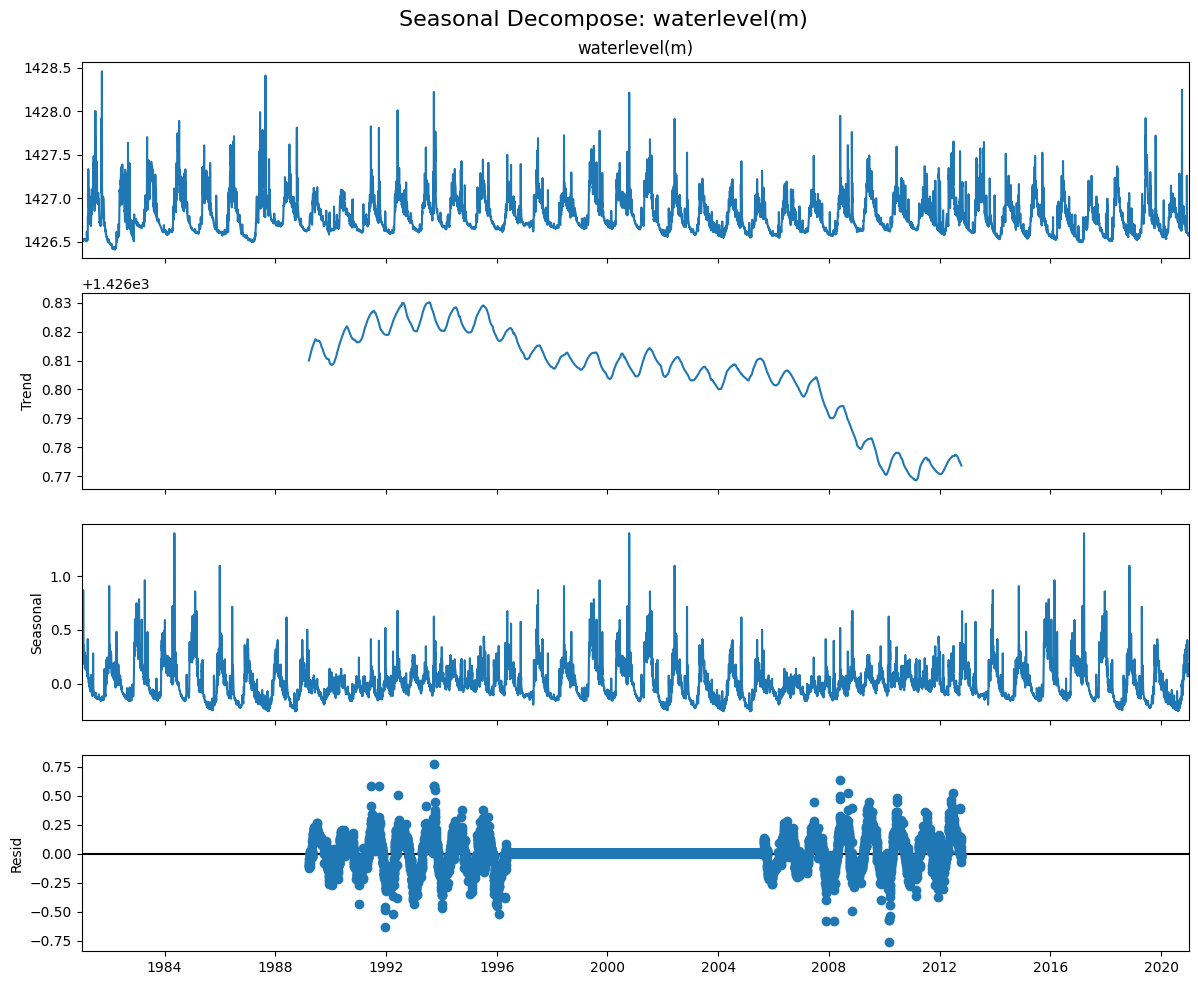

p-Wert ganze Zeitreihe (waterlevel(m)): 0.000000
p-Wert Residuen (waterlevel(m)): 0.000000
p-Wert Trend (waterlevel(m)): 0.452642
--------------------------------------------------


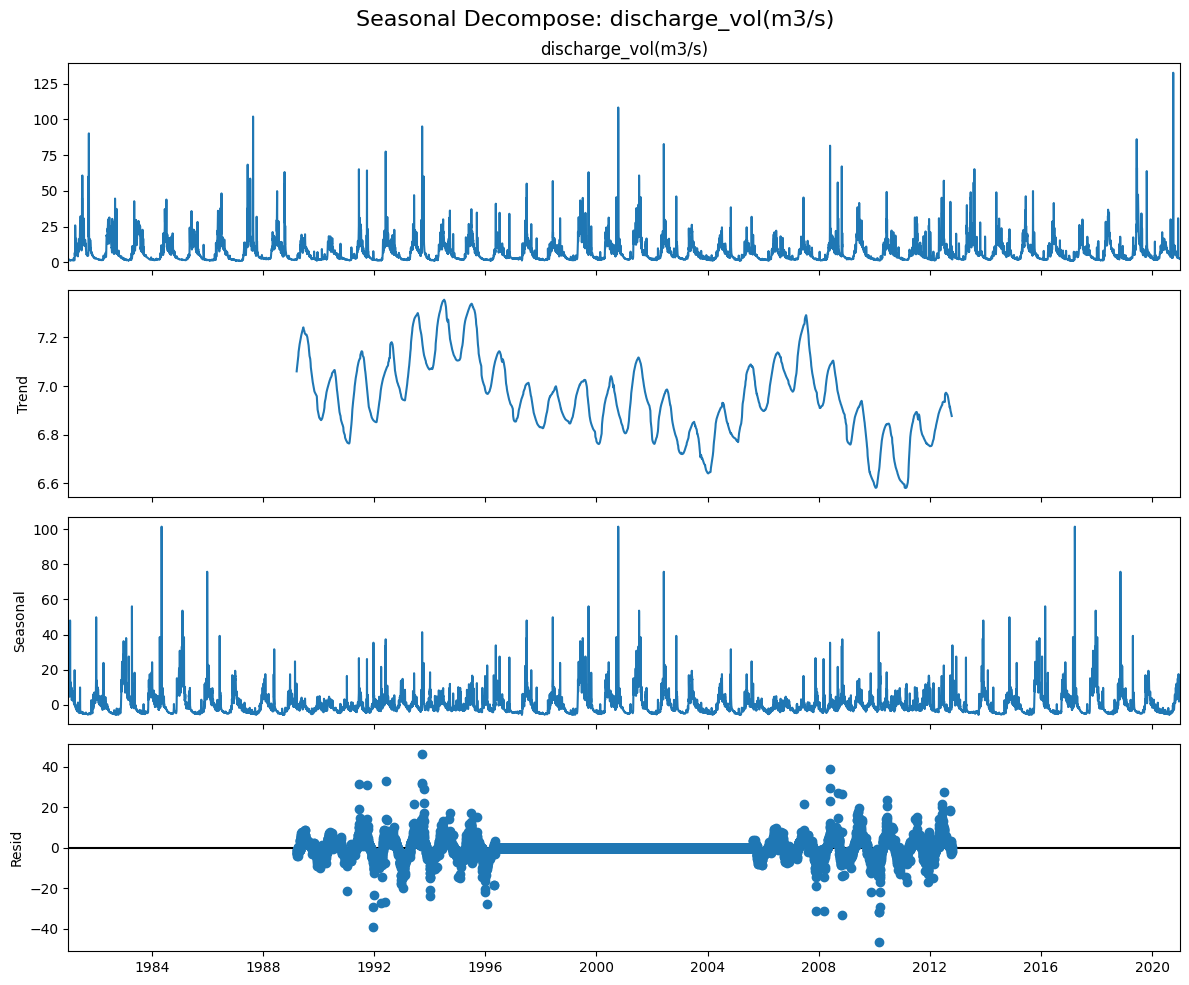

p-Wert ganze Zeitreihe (discharge_vol(m3/s)): 0.000000
p-Wert Residuen (discharge_vol(m3/s)): 0.000000
p-Wert Trend (discharge_vol(m3/s)): 0.000002
--------------------------------------------------


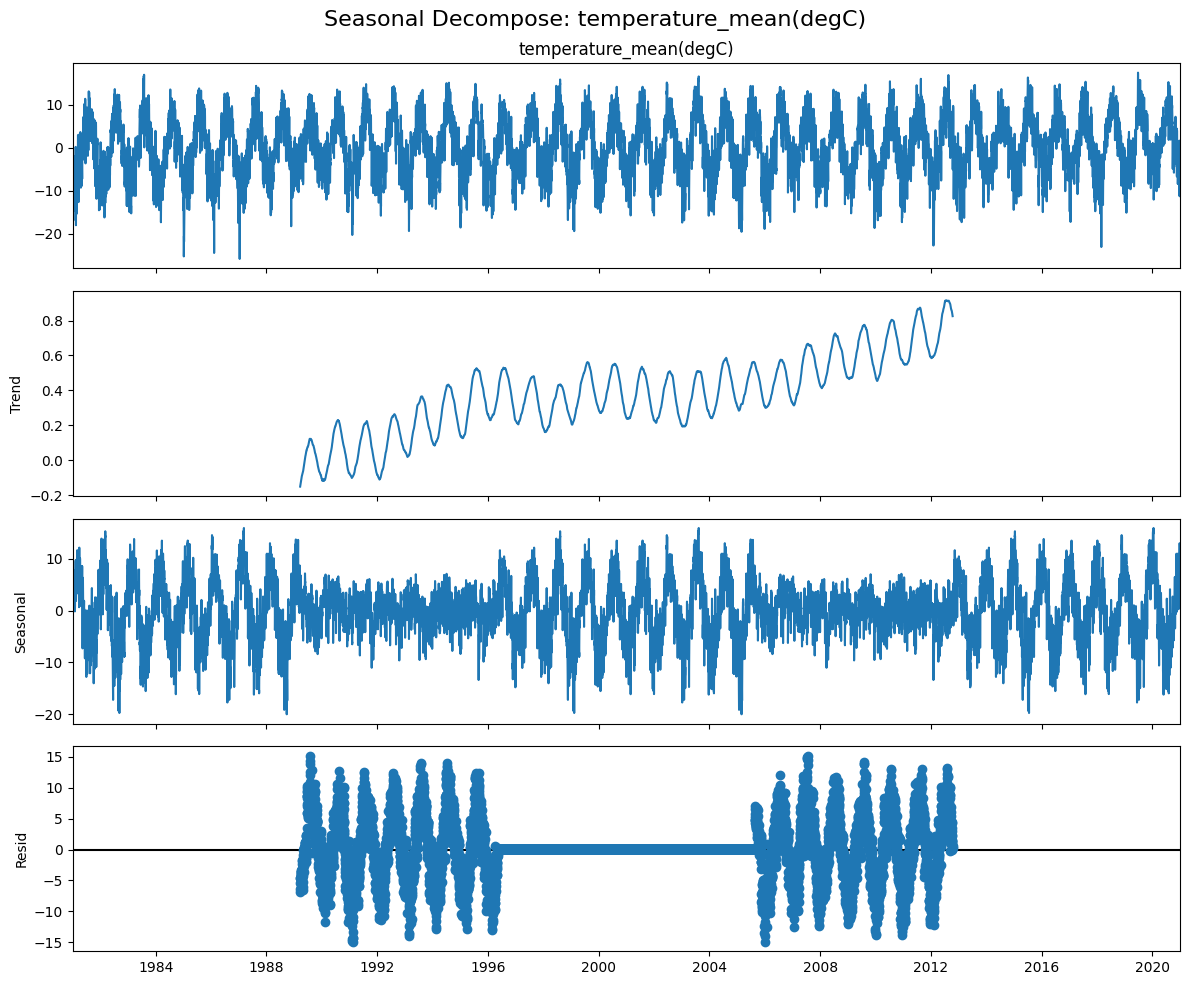

p-Wert ganze Zeitreihe (temperature_mean(degC)): 0.000000
p-Wert Residuen (temperature_mean(degC)): 0.000000
p-Wert Trend (temperature_mean(degC)): 0.000001
--------------------------------------------------


In [161]:
plot_seasonal_decompose_all(df_important_coef, period=6001, model_type='additive')

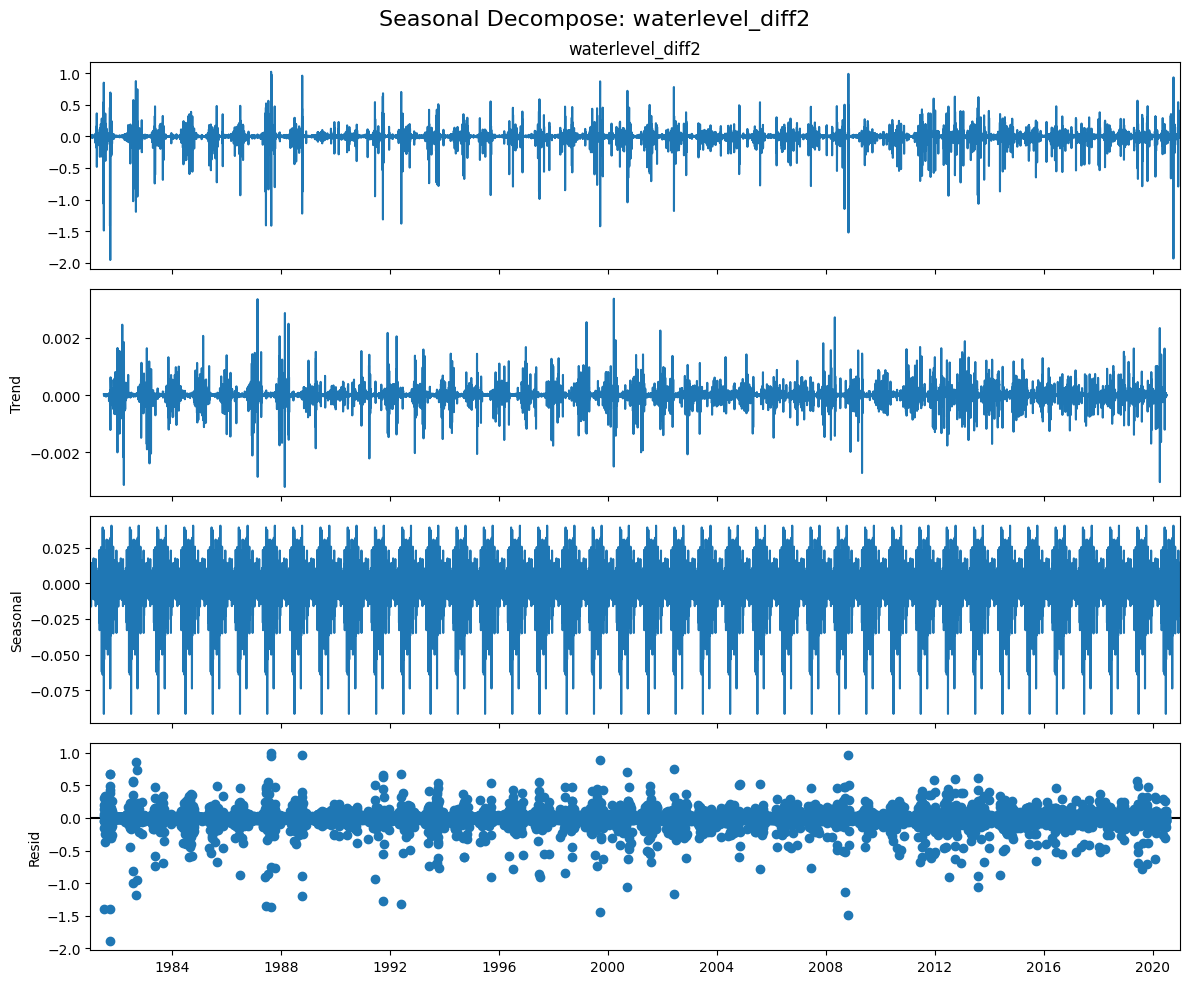

p-Wert ganze Zeitreihe (waterlevel_diff2): 0.000000
p-Wert Residuen (waterlevel_diff2): 0.000000
p-Wert Trend (waterlevel_diff2): 0.000000
--------------------------------------------------


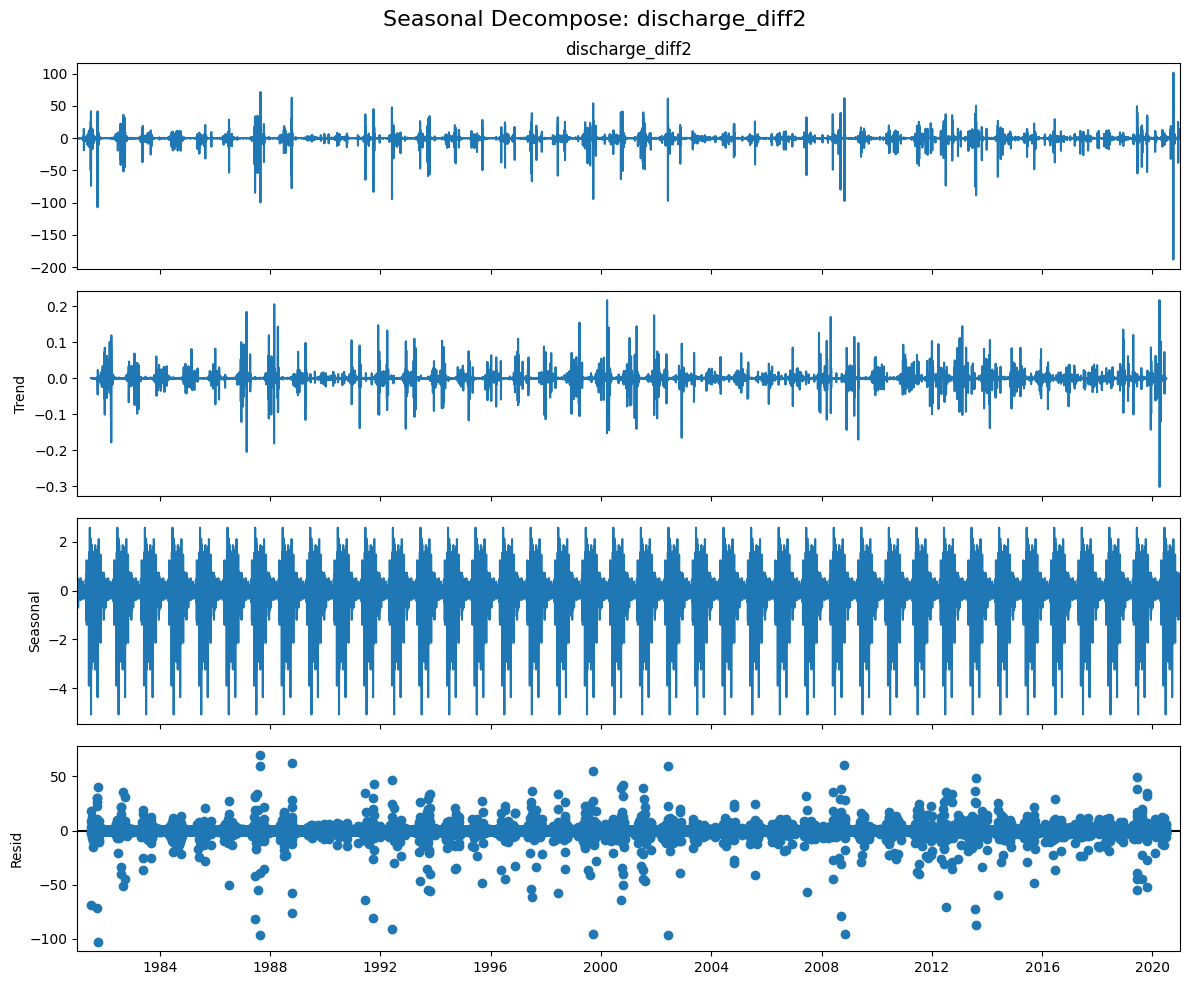

p-Wert ganze Zeitreihe (discharge_diff2): 0.000000
p-Wert Residuen (discharge_diff2): 0.000000
p-Wert Trend (discharge_diff2): 0.000000
--------------------------------------------------


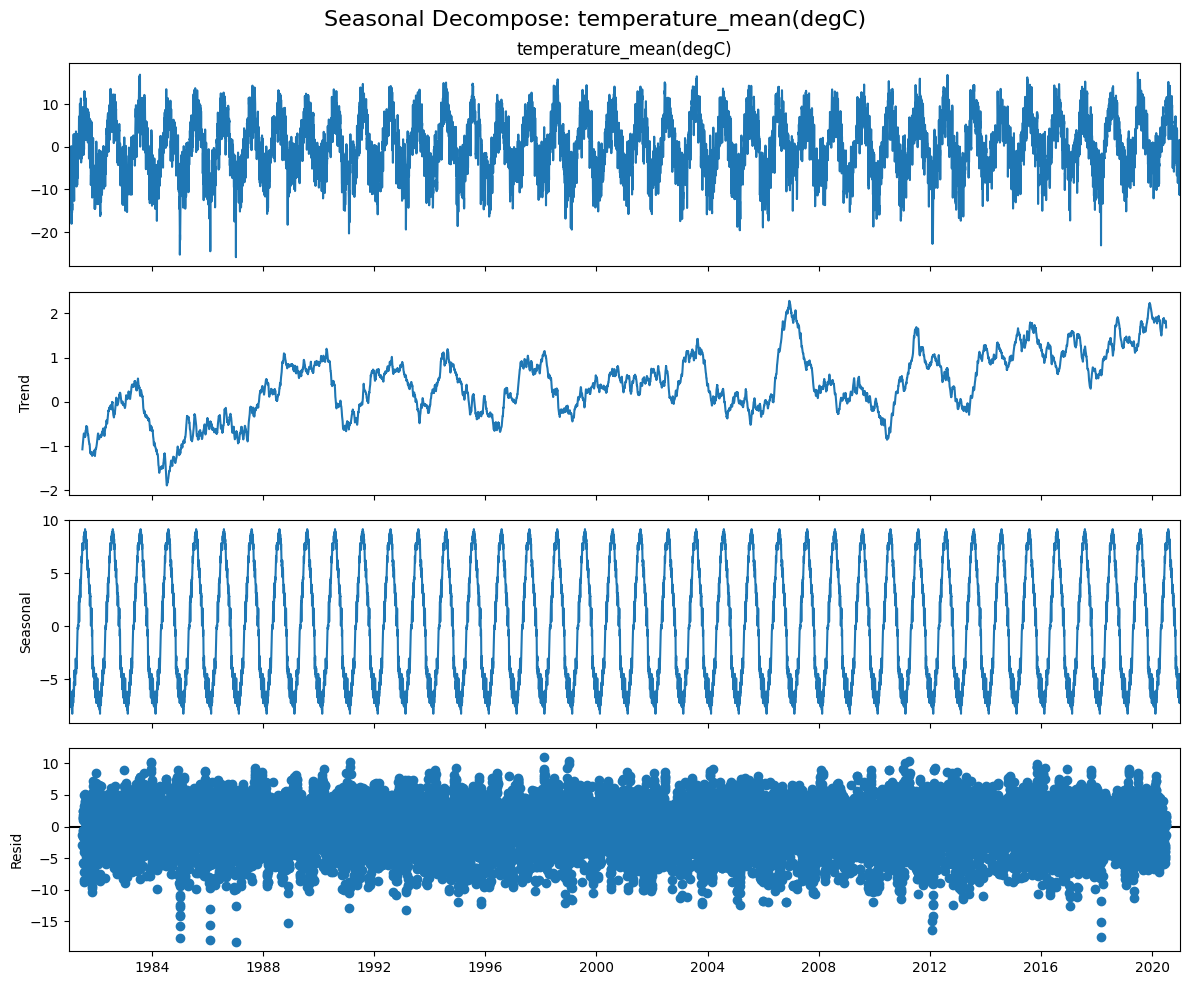

p-Wert ganze Zeitreihe (temperature_mean(degC)): 0.000000
p-Wert Residuen (temperature_mean(degC)): 0.000000
p-Wert Trend (temperature_mean(degC)): 0.010135
--------------------------------------------------


In [ ]:
plot_seasonal_decompose_all(df_important_coef_diff, period=365)

## Stationärität
Die Residuen sind nicht stationär. Das muss folgend angepasst werden

Grad 1 - AIC: 99495.07, BIC: 99510.25, ADF p-Wert Residuen: 0.000000
Grad 2 - AIC: 99478.08, BIC: 99500.85, ADF p-Wert Residuen: 0.000000
Grad 3 - AIC: 99479.97, BIC: 99510.33, ADF p-Wert Residuen: 0.000000
Grad 4 - AIC: 100220.19, BIC: 100250.54, ADF p-Wert Residuen: 0.000000
Grad 5 - AIC: 101637.85, BIC: 101668.21, ADF p-Wert Residuen: 0.000000
Grad 6 - AIC: 101628.88, BIC: 101666.83, ADF p-Wert Residuen: 0.000000
Grad 7 - AIC: 101630.86, BIC: 101676.40, ADF p-Wert Residuen: 0.000000
Grad 8 - AIC: 101631.54, BIC: 101684.66, ADF p-Wert Residuen: 0.000000
Grad 9 - AIC: 101633.31, BIC: 101694.03, ADF p-Wert Residuen: 0.000000
Grad 10 - AIC: 101635.03, BIC: 101703.33, ADF p-Wert Residuen: 0.000000
Bestes Modell basierend auf AIC: Grad 2


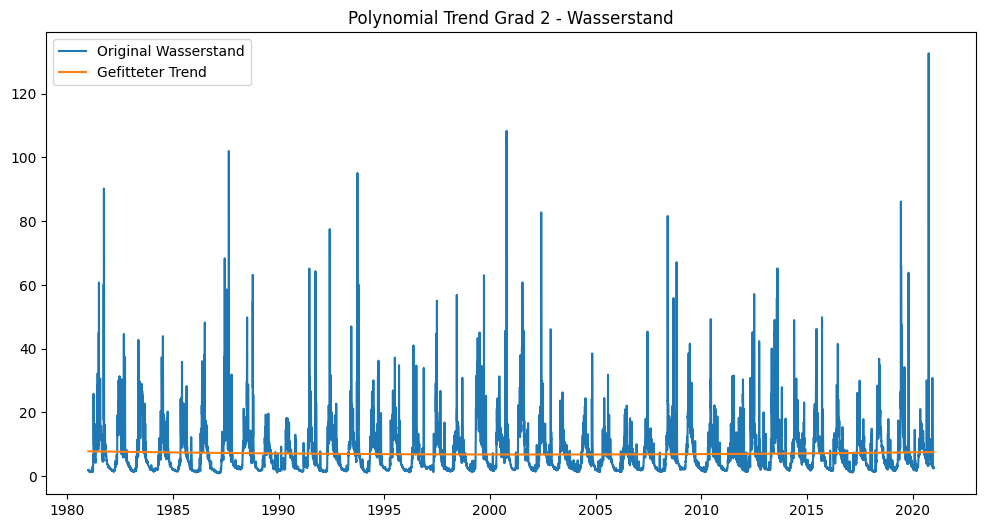

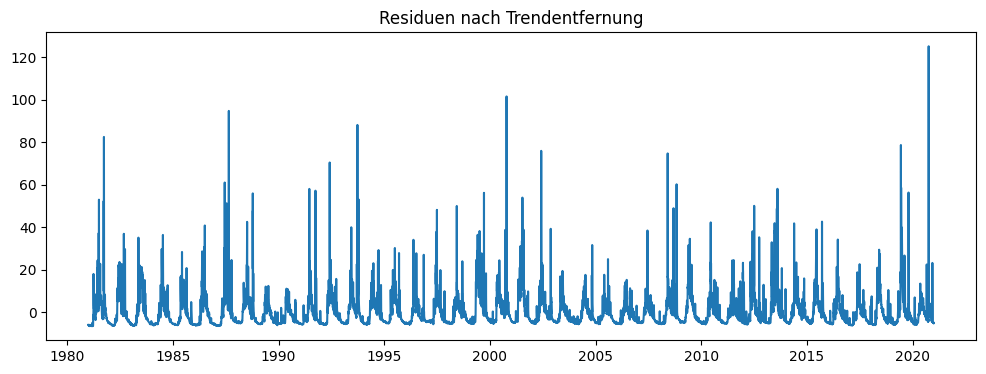

In [ ]:
import statsmodels.api as sm

# Polynomial-Regressions-Trend für 'discharge_vol(m3/s)'
df = df_important_coef.copy()

# Zeit als fortlaufender numerischer Index
df['time_index'] = np.arange(len(df))

# Wähle abhängig von Zielvariable, Beispiel hier für 'discharge_vol(m3/s)'
y = df['discharge_vol(m3/s)'].dropna()
X_base = df.loc[y.index, 'time_index']

# Teste Polynomgrade 1 bis 10
results = {}
for degree in range(1, 11):
    # Designmatrix für Polynomialfeatures erstellen
    X_poly = np.column_stack([X_base**d for d in range(1, degree+1)])
    X_poly = sm.add_constant(X_poly)
    
    # Modell fitten
    model = sm.OLS(y, X_poly).fit()
    
    # Vorhersage des Trendanteils
    trend_fit = model.predict(X_poly)
    
    # Residuen = Originalwerte minus Trend
    resid = y - trend_fit
    
    # Test auf Stationarität mit ADF-Test
    adf_result = adfuller(resid.dropna())
    p_value = adf_result[1]
    
    # Speichere Modell & p-Wert des ADF-Test
    results[degree] = {'model': model, 'p_adf': p_value, 'residuals': resid}
    
    print(f'Grad {degree} - AIC: {model.aic:.2f}, BIC: {model.bic:.2f}, ADF p-Wert Residuen: {p_value:.6f}')

# Beispiel: Plot für bestes Modell (niedrigster AIC)
best_degree = min(results, key=lambda d: results[d]['model'].aic)
print(f'Bestes Modell basierend auf AIC: Grad {best_degree}')

plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Original Wasserstand')
plt.plot(y.index, results[best_degree]['model'].predict(sm.add_constant(np.column_stack([X_base**d for d in range(1, best_degree+1)]))), label='Gefitteter Trend')
plt.legend()
plt.title(f'Polynomial Trend Grad {best_degree} - Wasserstand')
plt.show()

# Optional: Reststruktur weiter analysieren
resid_best = results[best_degree]['residuals']
plt.figure(figsize=(12,4))
plt.plot(resid_best.index, resid_best, label='Residuen')
plt.title('Residuen nach Trendentfernung')
plt.show()


In [ ]:
period = 365  # z.B. Periodenlänge eines Jahres
resid_best = results[best_degree]['residuals']

resid_seasonal_diff = resid_best.diff(period).dropna()
adf_result_seasonal = adfuller(resid_seasonal_diff)
print(f'ADF p-Wert nach saisonalem Differenzieren: {adf_result_seasonal[1]:.6f}')


ADF p-Wert nach saisonalem Differenzieren: 0.000000


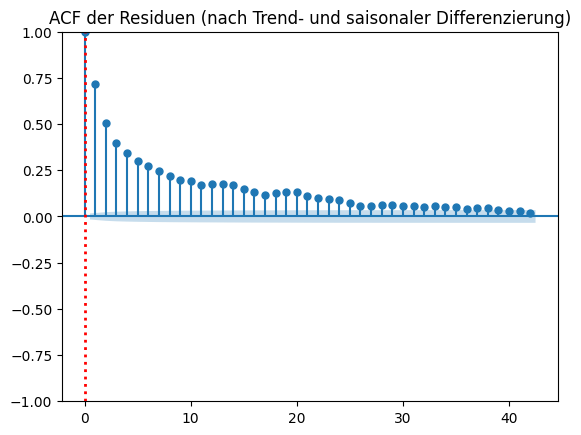

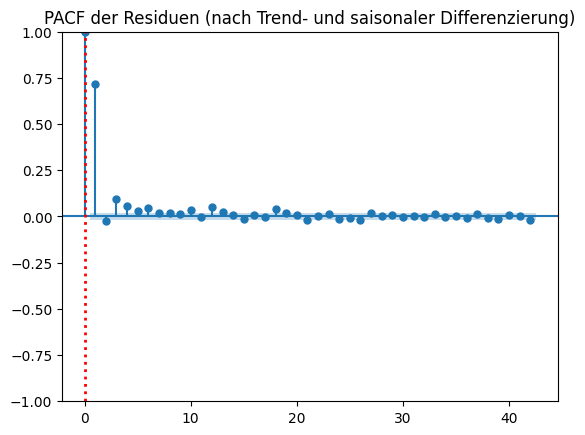

ARCH-Test p-Wert: 0.000000


In [ ]:
# ACF-Plot der Residuen
sm.graphics.tsa.plot_acf(resid_seasonal_diff)
plt.title("ACF der Residuen (nach Trend- und saisonaler Differenzierung)")
plt.axvline(x=0, color='red', linestyle=':', linewidth=2) # Rote, gestrichelte Linie (dotted) bei Lag 1
plt.show()

sm.graphics.tsa.plot_pacf(resid_seasonal_diff)
plt.title("PACF der Residuen (nach Trend- und saisonaler Differenzierung)")
plt.axvline(x=0, color='red', linestyle=':', linewidth=2) # Rote, gestrichelte Linie (dotted) bei Lag 1

plt.show()

# Optional: Test auf Heteroskedastizität
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(resid_seasonal_diff)
print(f'ARCH-Test p-Wert: {arch_test[1]:.6f}')


In [ ]:
from arch import arch_model

model = arch_model(resid_seasonal_diff.dropna(), vol='GARCH', p=1, q=1)
garch_fit = model.fit(disp="off")
print(garch_fit.summary())


                      Constant Mean - GARCH Model Results                      
Dep. Variable:     discharge_vol(m3/s)   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:               -40689.9
Distribution:                   Normal   AIC:                           81387.9
Method:             Maximum Likelihood   BIC:                           81418.1
                                         No. Observations:                14245
Date:                  Di, Okt 28 2025   Df Residuals:                    14244
Time:                         14:53:07   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0253      0.131     -0.193      0.847 [ -0.2

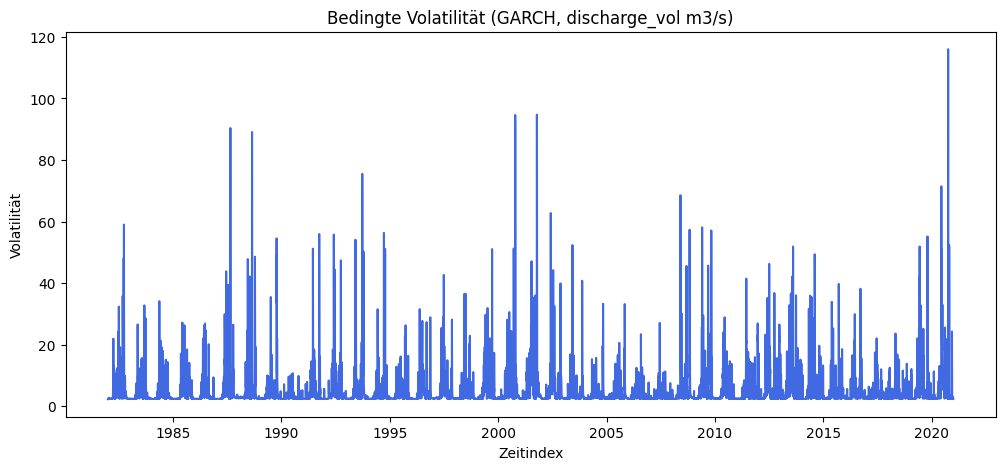

In [ ]:
# Die Vorhersage der bedingten Standardabweichung (Volatilität)
volatility = garch_fit.conditional_volatility

plt.figure(figsize=(12,5))
plt.plot(volatility, color='royalblue')
plt.title('Bedingte Volatilität (GARCH, discharge_vol m3/s)')
plt.xlabel('Zeitindex')
plt.ylabel('Volatilität')

plt.show()


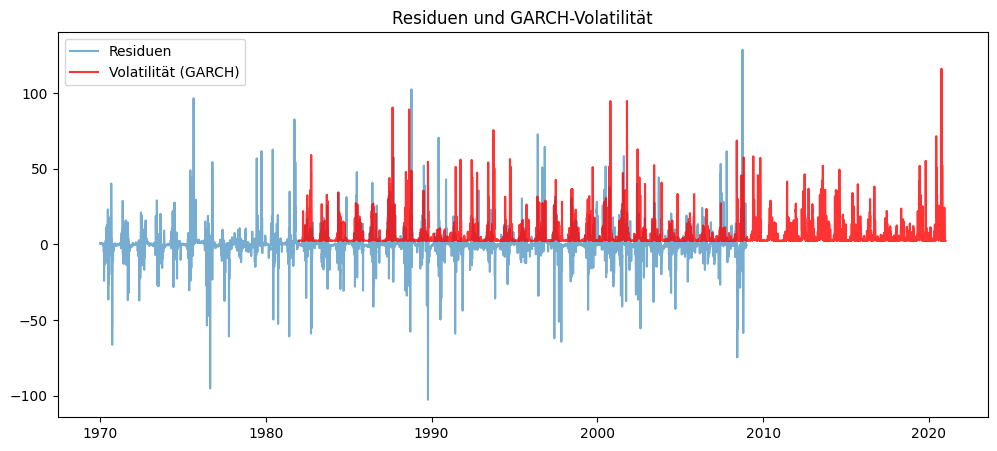

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(resid_seasonal_diff.dropna().reset_index(drop=True), label='Residuen', alpha=0.6)
plt.plot(volatility, color='red', label='Volatilität (GARCH)', alpha=0.8)
plt.title('Residuen und GARCH-Volatilität')
plt.legend()
plt.show()


## STL - Model

nach dem wir alle diese anpassungen gemacht haben, haben wir erst bemerkt (oder wirklich verstanden), dass der Trend nicht genügend gesmooth ist. Deshalb haben wir anstelle des seasonal_decompose, das den moving average verwendet und wenig direkt Steuerung zulässt, die zerlegung mit STL versucht

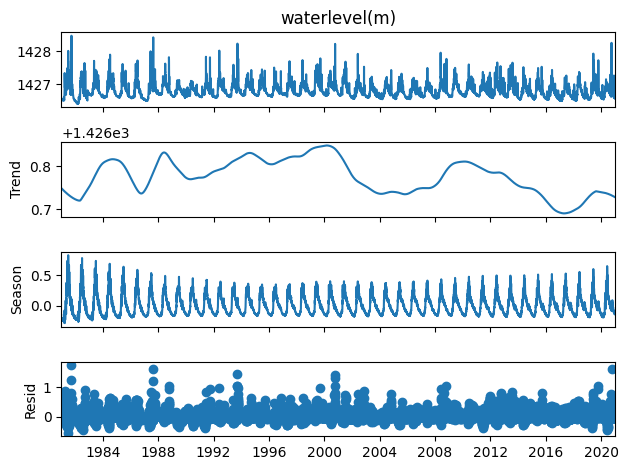

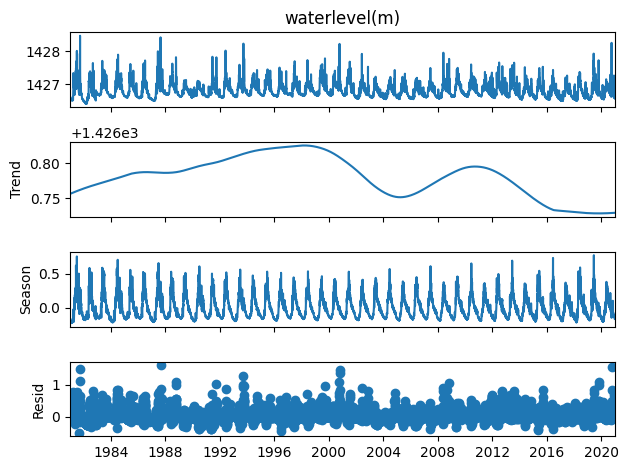

In [166]:
from statsmodels.tsa.seasonal import STL

stl = STL(df_important_coef['waterlevel(m)'], period=365, trend=1001, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()


stl = STL(df_important_coef['waterlevel(m)'], period=1095, trend=3285, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()


In [174]:
df_important_coef_diff

,waterlevel(m),discharge_vol(m3/s),temperature_mean(degC),waterlevel_diff,discharge_diff,waterlevel_diff2,discharge_diff2
date,,,,,,,
1981-01-03,1426.550,1.827,-3.90,0.004,0.064,0.017,0.261
1981-01-04,1426.550,1.837,-7.57,0.000,0.010,-0.004,-0.054
1981-01-05,1426.546,1.771,-14.08,-0.004,-0.066,-0.004,-0.076
1981-01-06,1426.551,1.855,-12.79,0.005,0.084,0.009,0.150
1981-01-07,1426.542,1.723,-16.89,-0.009,-0.132,-0.014,-0.216
...,...,...,...,...,...,...,...
2020-12-27,1426.579,2.546,-7.29,-0.008,-0.131,-0.018,-0.299
2020-12-28,1426.589,2.712,-8.97,0.010,0.166,0.018,0.297
2020-12-29,1426.583,2.616,-8.95,-0.006,-0.096,-0.016,-0.262


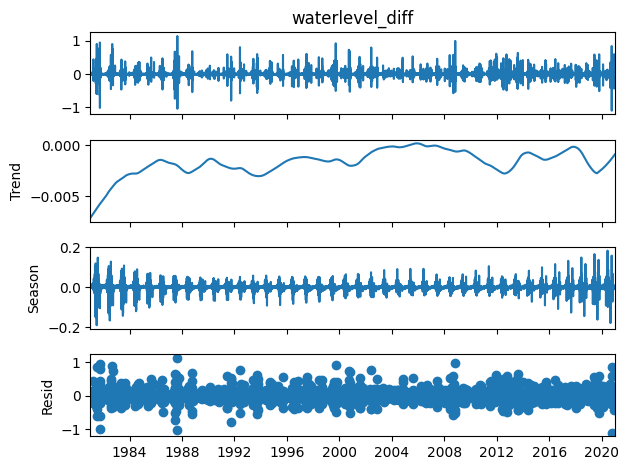

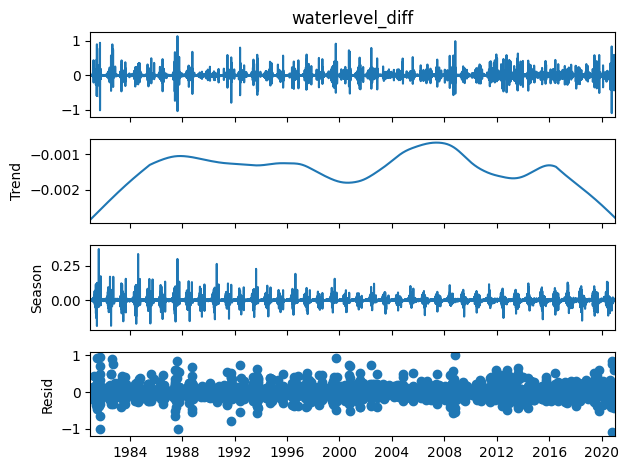

In [177]:
stl = STL(df_important_coef_diff['waterlevel_diff'], period=365, trend=1001, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()


stl = STL(df_important_coef_diff['waterlevel_diff'], period=1095, trend=3285, seasonal=25, robust=True)
result = stl.fit()
result.plot()
plt.show()

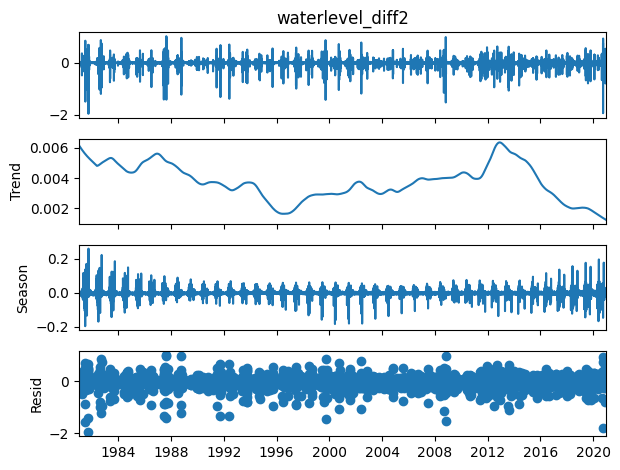

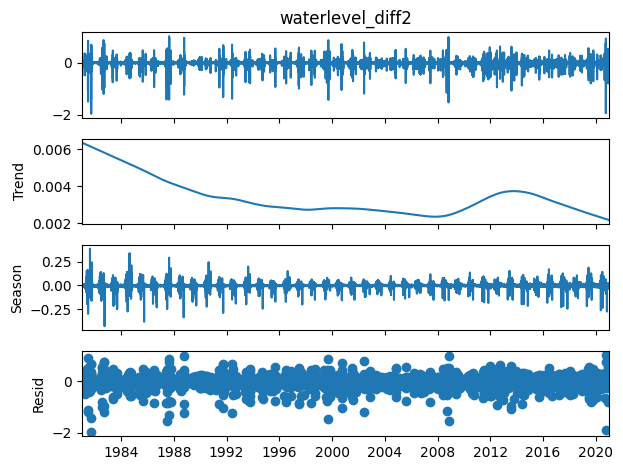

In [176]:
stl = STL(df_important_coef_diff['waterlevel_diff2'], period=365, trend=1001, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()


stl = STL(df_important_coef_diff['waterlevel_diff2'], period=1095, trend=3285, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()

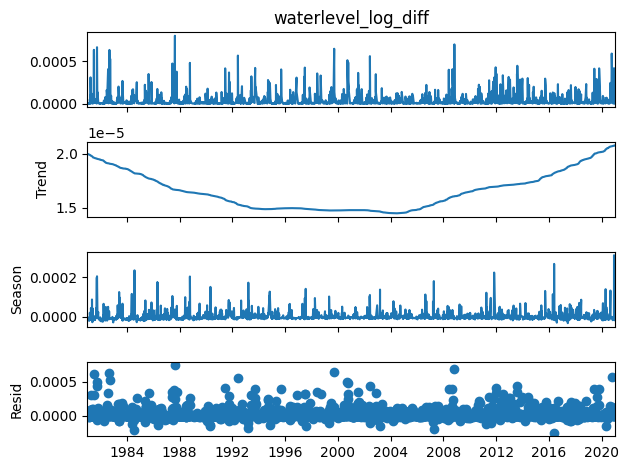

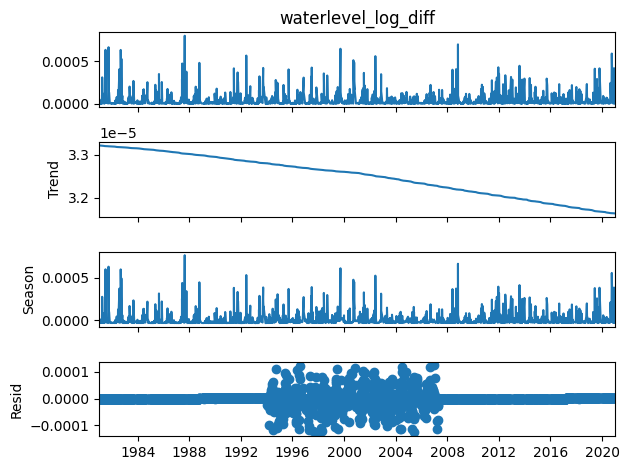

In [168]:
stl = STL(df_important_coef_log['waterlevel_log_diff'], period=365, trend=1001, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()


stl = STL(df_important_coef_log['waterlevel_log_diff'], period=1095, trend=3285, seasonal=13, robust=True)
result = stl.fit()
result.plot()
plt.show()

## Modellierung: Zerlegung

In [ ]:
df_important_coef

,waterlevel(m),discharge_vol(m3/s),temperature_mean(degC)
date,,,
1981-01-01,1426.559,1.960,-7.66
1981-01-02,1426.546,1.763,-10.12
1981-01-03,1426.550,1.827,-3.90
1981-01-04,1426.550,1.837,-7.57
1981-01-05,1426.546,1.771,-14.08
...,...,...,...
2020-12-27,1426.579,2.546,-7.29
2020-12-28,1426.589,2.712,-8.97
2020-12-29,1426.583,2.616,-8.95


In [ ]:
# Libraries für Zeitreihenanalyse
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, ccf
from statsmodels.tsa.stattools import adfuller

In [ ]:
df_important_coef['temperature_mean(degC)']

date
1981-01-01    -7.66
1981-01-02   -10.12
1981-01-03    -3.90
1981-01-04    -7.57
1981-01-05   -14.08
              ...  
2020-12-27    -7.29
2020-12-28    -8.97
2020-12-29    -8.95
2020-12-30   -11.20
2020-12-31   -10.52
Name: temperature_mean(degC), Length: 14610, dtype: float64

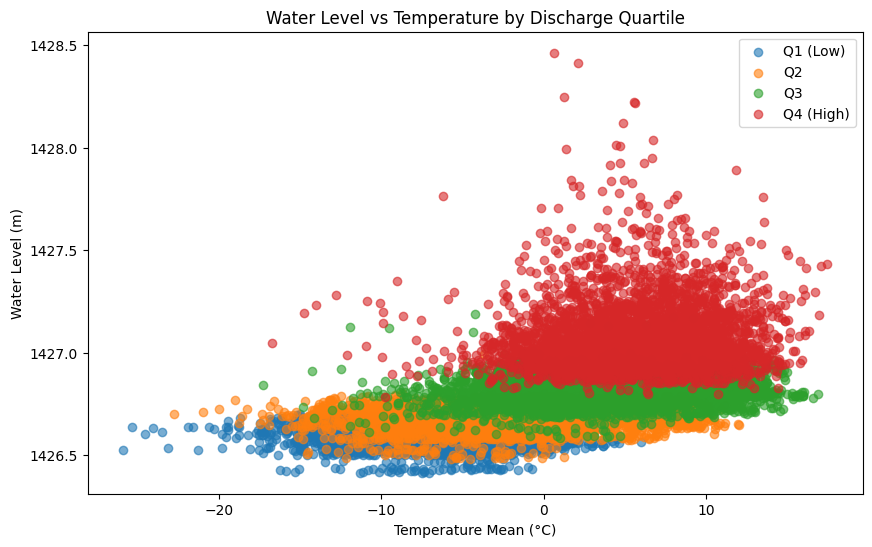

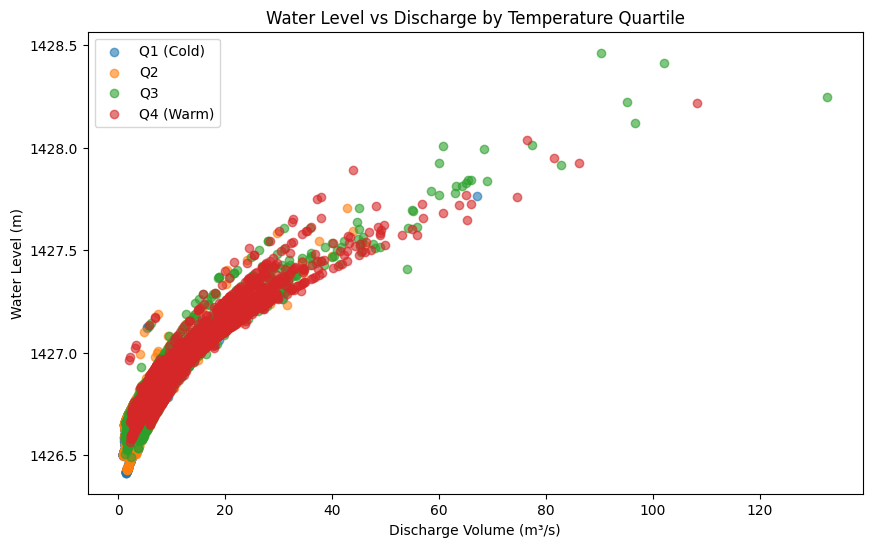

In [ ]:
df_important_coef_quantile = df_important_coef.copy()
# Plot 1: Water Level vs Temperature by Discharge Quartile
df_important_coef_quantile['discharge_quartile'] = pd.qcut(
    df_important_coef_quantile['discharge_vol(m3/s)'], 
    q=4, 
    labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)']
)

plt.figure(figsize=(10, 6))
for quartile in df_important_coef_quantile['discharge_quartile'].unique():
    subset = df_important_coef_quantile[df_important_coef_quantile['discharge_quartile'] == quartile]
    plt.scatter(subset['temperature_mean(degC)'], subset['waterlevel(m)'], 
                label=quartile, alpha=0.6)

plt.xlabel('Temperature Mean (°C)')
plt.ylabel('Water Level (m)')
plt.title('Water Level vs Temperature by Discharge Quartile')
plt.legend()
plt.show()

# Plot 2: Water Level vs Discharge by Temperature Quartile (your original plot)
df_important_coef_quantile['temp_quartile'] = pd.qcut(
    df_important_coef_quantile['temperature_mean(degC)'], 
    q=4, 
    labels=['Q1 (Cold)', 'Q2', 'Q3', 'Q4 (Warm)']
)

plt.figure(figsize=(10, 6))
for quartile in df_important_coef_quantile['temp_quartile'].unique():
    subset = df_important_coef_quantile[df_important_coef_quantile['temp_quartile'] == quartile]
    plt.scatter(subset['discharge_vol(m3/s)'], subset['waterlevel(m)'], 
                label=quartile, alpha=0.6)

plt.xlabel('Discharge Volume (m³/s)')
plt.ylabel('Water Level (m)')
plt.title('Water Level vs Discharge by Temperature Quartile')
plt.legend()
plt.show();

In [ ]:
df_important_coef

,waterlevel(m),discharge_vol(m3/s),temperature_mean(degC)
date,,,
1981-01-01,1426.559,1.960,-7.66
1981-01-02,1426.546,1.763,-10.12
1981-01-03,1426.550,1.827,-3.90
1981-01-04,1426.550,1.837,-7.57
1981-01-05,1426.546,1.771,-14.08
...,...,...,...
2020-12-27,1426.579,2.546,-7.29
2020-12-28,1426.589,2.712,-8.97
2020-12-29,1426.583,2.616,-8.95


In [ ]:
test = df_important_coef['temperature_mean(degC)']
test

date
1981-01-01    -7.66
1981-01-02   -10.12
1981-01-03    -3.90
1981-01-04    -7.57
1981-01-05   -14.08
              ...  
2020-12-27    -7.29
2020-12-28    -8.97
2020-12-29    -8.95
2020-12-30   -11.20
2020-12-31   -10.52
Name: temperature_mean(degC), Length: 14610, dtype: float64

In [ ]:
df_vol = df_important_coef['discharge_vol(m3/s)']
df_temp = df_important_coef['temperature_mean(degC)']

# Zerlegung in Komponenten
df_vol_comp = seasonal_decompose(df_vol, model='multiplicative')    # model : {"additive", "multiplicative"}, optional
df_temp_comp = seasonal_decompose(df_temp, model='additive')

p-Wert ganze Zeitreihe: 0.000000
p-Wert Trend: 0.000000
p-Wert Residuen: 0.000000


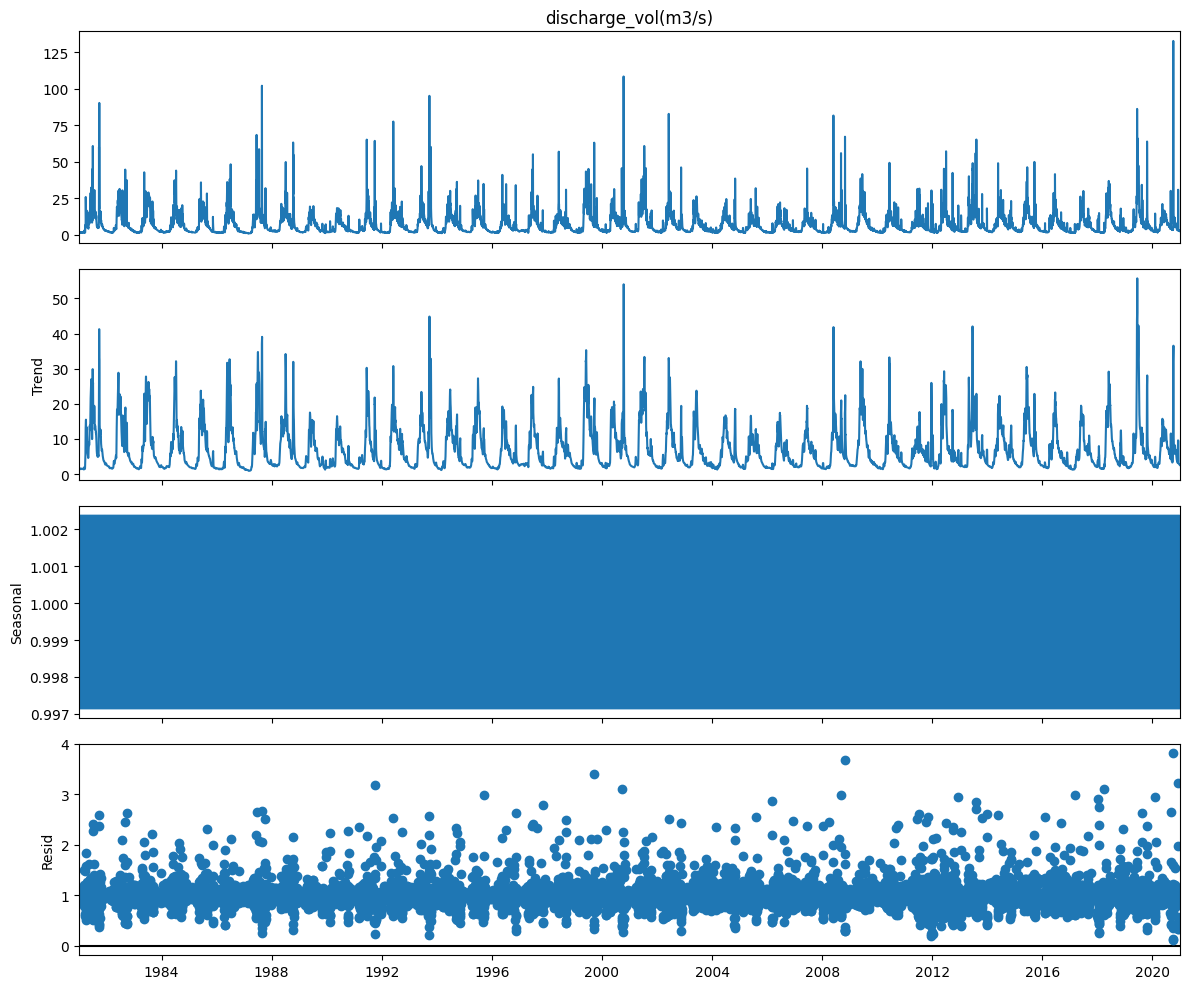

In [ ]:
# 1. Zerlegung
fig=df_vol_comp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()

# 2. Entfernung der NaNs
vol_trend = df_vol_comp.trend
vol_trend = vol_trend[vol_trend.notnull()]

vol_resid = df_vol_comp.resid
vol_redid = vol_resid[vol_resid.notnull()]

vol_seasonal = df_vol_comp.seasonal
vol_seasonal = vol_seasonal[vol_seasonal.notnull()]

# 3. Stationaritätstests - Plots s. Zerlegung
r = adfuller(df_vol_comp.observed, maxlag=12)
print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')

r = adfuller(vol_trend, maxlag=12)
print(f'p-Wert Trend: {r[1]:.6f}')

r = adfuller(vol_resid.dropna(), maxlag=12)
print(f'p-Wert Residuen: {r[1]:.6f}')


p-Wert ganze Zeitreihe: 0.000000
p-Wert Residuen: 0.000000
p-Wert Trend: 0.000000


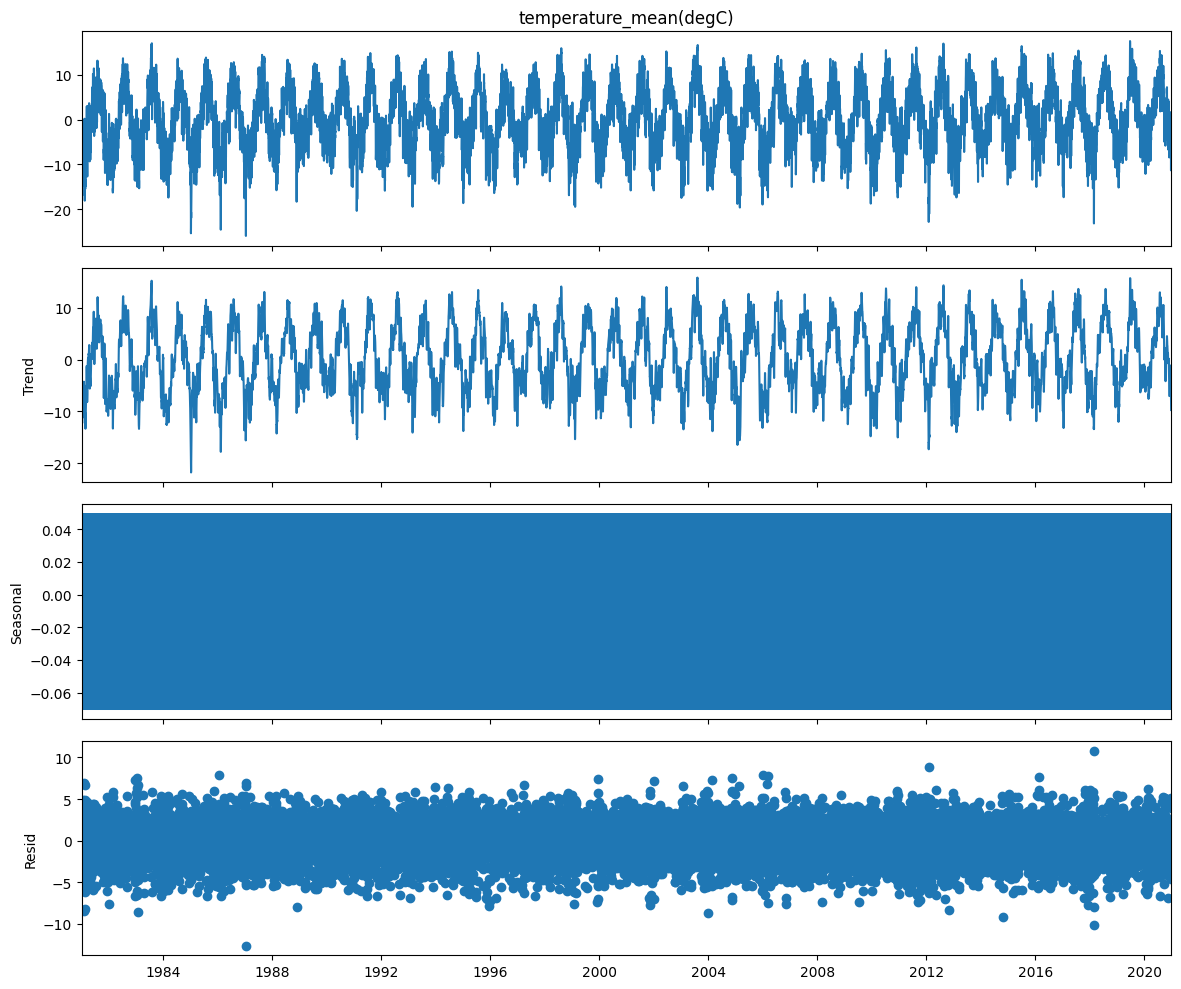

In [ ]:
# 1. Zerlegung
fig=df_temp_comp.plot()
fig.set_size_inches(12,10)
fig.tight_layout()

# 2. Entfernung der NaNs
temp_trend = df_temp_comp.trend
temp_trend = temp_trend[temp_trend.notnull()]

temp_resid = df_temp_comp.resid
temp_resid = temp_resid[temp_resid.notnull()]

temp_seasonal = df_temp_comp.seasonal
temp_seasonal = temp_seasonal[temp_seasonal.notnull()]

# 3. Stationaritätstests - Plots s. Zerlegung
r=adfuller(df_temp_comp.observed,maxlag=12)
print(f'p-Wert ganze Zeitreihe: {r[1]:.6f}')

r=adfuller(temp_resid ,maxlag=12)
print(f'p-Wert Residuen: {r[1]:.6f}')

r=adfuller(temp_trend ,maxlag=12)
print(f'p-Wert Trend: {r[1]:.6f}')


## Schtritt 2a: Manuelle Zerlegung

In [ ]:
# Weitere Libraries für linearen Trend
from sklearn.linear_model import LinearRegression

In [ ]:
df_vol

date
1981-01-01    1.960
1981-01-02    1.763
1981-01-03    1.827
1981-01-04    1.837
1981-01-05    1.771
              ...  
2020-12-27    2.546
2020-12-28    2.712
2020-12-29    2.616
2020-12-30    2.615
2020-12-31    2.496
Name: discharge_vol(m3/s), Length: 14610, dtype: float64

**Langfrist-Trend**

Einfaches lineares Modell

In [ ]:
df_vol_man = df_vol
df_vol_man['date']=df_vol_man.index.year+df_vol.index.month/12
# Variablen zur Regression
x=pd.to_numeric(df_vol_man['date']).values.reshape(-1,1)
y=df_vol_man['discharge_vol(m3/s)'].values

C:\Users\Sandra\AppData\Local\Temp\ipykernel_304\1371129684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_man['date']=df_vol_man.index.year+df_vol.index.month/12


KeyError: 'discharge_vol(m3/s)'